In [118]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
import pickle

# 1.Load the pretrained Generator

In [119]:
def load_generator(model_path):
    """Load the pretrained GAN generator model"""
    try:
        generator = load_model(model_path)
        print(f"Generator loaded successfully from {model_path}")
        return generator
    except Exception as e:
        print(f"Error loading generator: {e}")
        return None


In [120]:
generator = load_generator('/content/generator_700.h5')

Generator loaded successfully from /content/generator_700.h5


# 2. Load the Gender Vector

In [121]:
def load_gender_vector(vector_path):
    """Load the gender direction vector from .npy file"""
    try:
        gender_vector = np.load(vector_path)
        print(f"Gender vector loaded successfully from {vector_path}")
        print(f"Gender vector shape: {gender_vector.shape}")
        return gender_vector
    except Exception as e:
        print(f"Error loading gender vector: {e}")
        return None

In [122]:
gender_vector = load_gender_vector('/content/gender_vec.npy')

Gender vector loaded successfully from /content/gender_vec.npy
Gender vector shape: (1, 100)


In [123]:
gender_vector.shape

(1, 100)

# 3. Generate the Latent Vector

In [124]:
def generate_latent_points(latent_dim=100, n_samples=1):
    """Generate random latent vectors as input for the generator"""
    z = np.random.randn(latent_dim * n_samples)
    z = z.reshape(n_samples, latent_dim)
    return z

In [125]:
LATENT_DIM=100
base_latent = generate_latent_points(LATENT_DIM, n_samples=1)

In [126]:
print(f"Base latent shape: {base_latent.shape}")

Base latent shape: (1, 100)


# 4. Generate Gender Variations

In [127]:
def generate_gender_variations(generator, base_latent, gender_vector, n_steps=10, alpha_range=(-3, 3)):
    """
    Generate variations of an image from male to female

    Parameters:
    - generator: Pretrained GAN generator model
    - base_latent: Base latent vector (starting point)
    - gender_vector: Gender direction vector
    - n_steps: Number of variations to generate
    - alpha_range: Range of interpolation (negative = male, positive = female)
    """
    generated_images = []
    alphas = np.linspace(alpha_range[0], alpha_range[1], n_steps)

    for alpha in alphas:
        # Modify latent vector along gender direction
        modified_latent = base_latent + alpha * gender_vector

        # Generate image
        generated_image = generator.predict(modified_latent, verbose=0)
        generated_images.append(generated_image[0])

    return generated_images, alphas

In [128]:
N_VARIATIONS = 10
ALPHA_RANGE = (-3, 3)
print(f"\n Generating {N_VARIATIONS} variations from male to female...")
images, alphas = generate_gender_variations(
    generator,
    base_latent,
    gender_vector,
    n_steps=N_VARIATIONS,
    alpha_range=ALPHA_RANGE
)


 Generating 10 variations from male to female...


# Visualize the generated Variations

In [129]:
def visualize_variations(images, alphas, figsize=(20, 4)):
    """Display the generated image variations"""
    n_images = len(images)
    fig, axes = plt.subplots(1, n_images, figsize=figsize)

    for i, (img, alpha) in enumerate(zip(images, alphas)):
        # Normalize image to [0, 1] range if needed
        if img.min() < 0:
            img = (img + 1) / 2.0

        axes[i].imshow(img)
        axes[i].axis('off')
        axes[i].set_title(f'α={alpha:.2f}', fontsize=10)

    plt.suptitle('Gender Style Transfer: Male → Female', fontsize=14, y=1.02)
    plt.tight_layout()
    plt.savefig('gender_variations.png', dpi=150, bbox_inches='tight')
    plt.show()
    print("Visualization saved as 'gender_variations.png'")

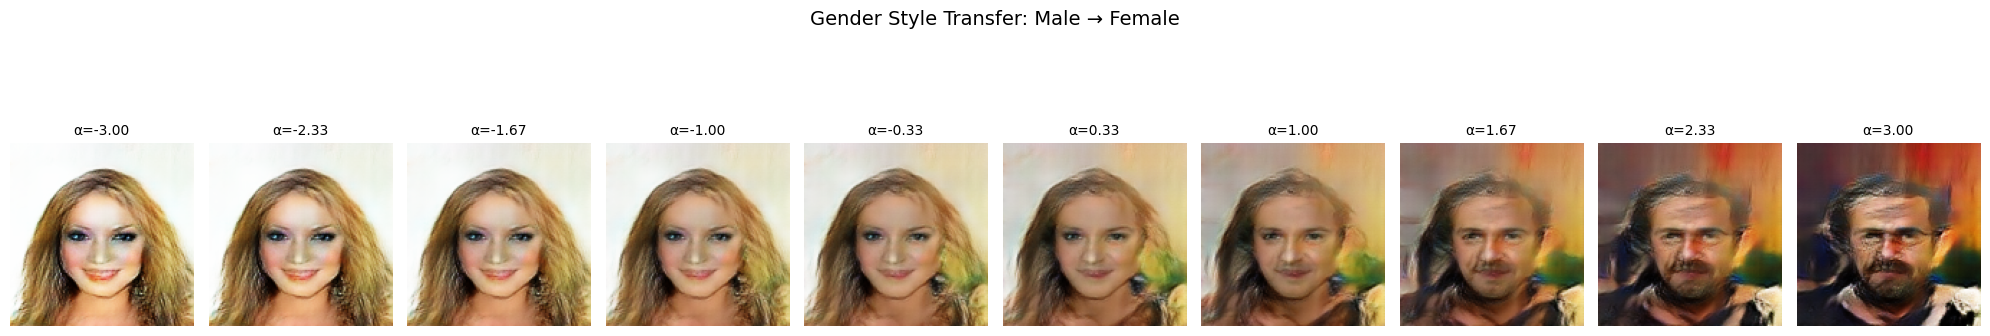

Visualization saved as 'gender_variations.png'


In [130]:
visualize_variations(images, alphas)
